In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint


In [ ]:
t = smp.symbols('t', real=True)
the, phi, psi= smp.symbols(r'\theta \phi \psi', cls=smp.Function)
#角度定義
the = the(t) #傾斜角度
phi = phi(t) #公轉角度
psi = psi(t) #自轉角度

# 速度定義
the_d = smp.diff(the,t)
phi_d = smp.diff(phi,t)
psi_d = smp.diff(psi,t)

# 加速度定義
the_dd = smp.diff(the_d,t)
phi_dd = smp.diff(phi_d,t)
psi_dd = smp.diff(psi_d,t)

In [ ]:
#轉動慣量
#Ixx = 0.00012875
#Izz = 0.00000000000001
#Iyy = 0.00012875
#Izz = 0.0000075

g = 9.8   #重力加速度
m = 0.15   #單擺質量
q = 280   #上方磁鐵磁偶
Q = 300   #下方磁鐵磁偶
l = 0.1   #擺長
r = 0.01   #磁鐵半徑
h = 0.003  #板子厚度
Ixx = 1/12*(3*0.01**2+0.1**2)
Iyy = Ixx
Izz = 0.000000001

In [ ]:
#x,y,z方向角速度的定義
omega = smp.Matrix([phi_d*smp.sin(the)*smp.sin(psi)+the_d*smp.cos(psi),
                    phi_d*smp.sin(the)*smp.cos(psi)-the_d*smp.sin(psi),
                    phi_d*smp.cos(the)+psi_d])
omega.T


Matrix([[sin(\psi(t))*sin(\theta(t))*Derivative(\phi(t), t) + cos(\psi(t))*Derivative(\theta(t), t), -sin(\psi(t))*Derivative(\theta(t), t) + sin(\theta(t))*cos(\psi(t))*Derivative(\phi(t), t), cos(\theta(t))*Derivative(\phi(t), t) + Derivative(\psi(t), t)]])

In [ ]:
#轉動慣量
I = smp.Matrix([[Ixx,0,0],[0,Iyy,0],[0,0,Izz]])
I

Matrix([
[0.000858333333333333,                    0,      0],
[                   0, 0.000858333333333333,      0],
[                   0,                    0, 1.0e-9]])

In [ ]:
#質心與原點的距離
distance = -r*smp.cos(the) + r + l/2*smp.sin(the)

#質心的位置以x,y,z座標標示
z = -r*smp.sin(the)-1/2*smp.cos(the)
x = distance*smp.cos(phi)
y = distance*smp.sin(phi)

#質心在x,y,z方向上的速度
distance_d = smp.diff(distance,t)
x_d = smp.diff(x,t)
y_d = smp.diff(y,t)
z_d = smp.diff(z,t)

In [ ]:
translation = 1/2*m*(x_d**2 + y_d**2 + z_d**2) #移動動能
rotation = 1/2*omega.dot(I*omega).simplify()   #轉動動能

distance_to_charge = (r*r*(1-smp.cos(the))**2+(h+r*smp.sin(the))**2)**0.5 #兩個磁偶的距離
V = m*g*z
# - q*Q/10**7/distance_to_charge           #位能項(重力位能+磁力位能)
L = translation + rotation - V #拉格朗日


True

In [ ]:
#分別找出三個角度上的EOM
LE1 = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE1 = LE1.simplify()

LE2 = smp.diff(L, phi) - smp.diff(smp.diff(L, phi_d), t)
LE2 = LE2.simplify()

LE3 = smp.diff(L, psi) - smp.diff(smp.diff(L, psi_d), t)
LE3 = LE3.simplify()

sols = smp.solve([LE1, LE2, LE3], (the_dd, phi_dd, psi_dd),
                simplify=False, rational=False)

In [ ]:
LE1

1.90582413132218e-21*sin(2*\phi(t) - 2*\theta(t))*Derivative(\phi(t), t)*Derivative(\theta(t), t) + 1.90582413132218e-21*sin(2*\phi(t) + 2*\theta(t))*Derivative(\phi(t), t)*Derivative(\theta(t), t) - 3.81164826264435e-21*sin(2*\phi(t))*Derivative(\phi(t), t)*Derivative(\theta(t), t) + 1.5e-5*sin(\theta(t))*Derivative(\phi(t), t)**2 - 1.0e-9*sin(\theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t) - 0.735*sin(\theta(t)) + 0.000609166166666667*sin(2*\theta(t))*Derivative(\phi(t), t)**2 - 0.0185625*sin(2*\theta(t))*Derivative(\theta(t), t)**2 + 0.000675*sin(2*\theta(t))*Derivative(\theta(t), (t, 2)) + 1.90582413132218e-21*cos(2*\phi(t) - 2*\theta(t))*Derivative(\theta(t), (t, 2)) + 1.90582413132218e-21*cos(2*\phi(t) + 2*\theta(t))*Derivative(\theta(t), (t, 2)) - 3.81164826264435e-21*cos(2*\phi(t))*Derivative(\theta(t), (t, 2)) + 7.5e-5*cos(\theta(t))*Derivative(\phi(t), t)**2 + 0.0147*cos(\theta(t)) - 7.5e-5*cos(2*\theta(t))*Derivative(\phi(t), t)**2 + 0.000675*cos(2*\theta(t))*Deriva

In [ ]:
dz1dt_f = smp.lambdify((the, phi, psi, the_d, phi_d, psi_d), sols[the_dd])
dthedt_f = smp.lambdify(the_d, the_d)

dz2dt_f = smp.lambdify((the, phi, psi, the_d, phi_d, psi_d), sols[phi_dd])
dphidt_f = smp.lambdify(phi_d, phi_d)

dz3dt_f = smp.lambdify((the, phi, psi, the_d, phi_d, psi_d), sols[psi_dd])
dpsidt_f = smp.lambdify(psi_d, psi_d)

def dSdt(S, t):
    the, z1, phi, z2, psi, z3 = S
    return [
        dthedt_f(z1),
        dz1dt_f(the,phi,psi,z1,z2,z3),
        dphidt_f(z2),
        dz2dt_f(the,phi,psi,z1,z2,z3),
        dpsidt_f(z3),
        dz3dt_f(the,phi,psi,z1,z2,z3),
    ]

In [ ]:
time = 1  #總共運行時間
dt = 0.001  #數值解的時間間隔
samples = time/dt
t = np.linspace(0, time, int(samples))
ans1 = odeint(dSdt, y0 = [0.5, 0.1, 0.1, 10, 0.1, 0.1],   t = t) #初始條件([theta角, theta角速度, phi角, phi角速度, psi角, psi角速度])

In [ ]:
#輸出某個時間點的各項參數(用於繪製動畫)
the = ans1.T[0]
phi = ans1.T[2]
psi = ans1.T[4]

path = r"Numerical Solution.txt"
with open (path,'w') as f:
  f.write(str([r,l,h,dt])+"\n")
  for n in range(0,int(samples)-1):
    distance = -r*smp.cos(the[n]) + r + l/2*smp.sin(the[n])
    x = distance*smp.cos(phi[n])
    y = distance*smp.sin(phi[n])
    z = -r*smp.sin(the[n])-l/2*smp.cos(the[n])
    f.write(str([n*dt,x,y,z,the[n],phi[n],psi[n]])+"\n")
f.close()


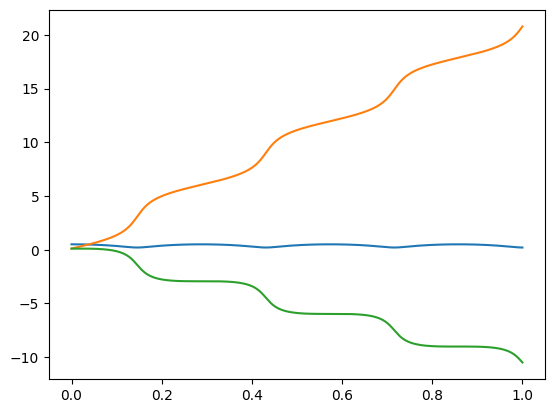

In [ ]:
plt.plot(t,the)
plt.plot(t, phi)
plt.plot(t, psi)
plt.show()